In [1]:
cd /content/drive/My Drive/Housing Prices Prediction

/content/drive/My Drive/Housing Prices Prediction


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

## Loading the Dataset

In [115]:
data=pd.read_csv('Housing.csv',delimiter=';')

In [116]:
data.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price
0,5850,3,1,2,1,0,1,0,0,1,0,42000
1,4000,2,1,1,1,0,0,0,0,0,0,38500
2,3060,3,1,1,1,0,0,0,0,0,0,49500
3,6650,3,1,2,1,1,0,0,0,0,0,60500
4,6360,2,1,1,1,0,0,0,0,0,0,61000


In [123]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
scaled=mm.fit_transform(np.array(data['lotsize']).reshape(-1,1))

In [124]:
mm.data_max_

array([16200.])

In [125]:
mm.data_min_

array([1650.])

In [126]:
mm.feature_range

(0, 1)

In [128]:
data_s=pd.DataFrame(scaled)

In [132]:
data

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price
0,5850,3,1,2,1,0,1,0,0,1,0,42000
1,4000,2,1,1,1,0,0,0,0,0,0,38500
2,3060,3,1,1,1,0,0,0,0,0,0,49500
3,6650,3,1,2,1,1,0,0,0,0,0,60500
4,6360,2,1,1,1,0,0,0,0,0,0,61000
...,...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,1,1,0,0,1,0,0,91500
542,6000,3,2,4,1,0,0,0,1,0,0,94000
543,6000,3,2,4,1,1,0,0,1,1,0,103000
544,6000,3,2,2,1,1,0,0,1,1,0,105000


In [135]:
data=pd.concat([data_s,data],axis=1,sort=False)

## Preprocessing the data

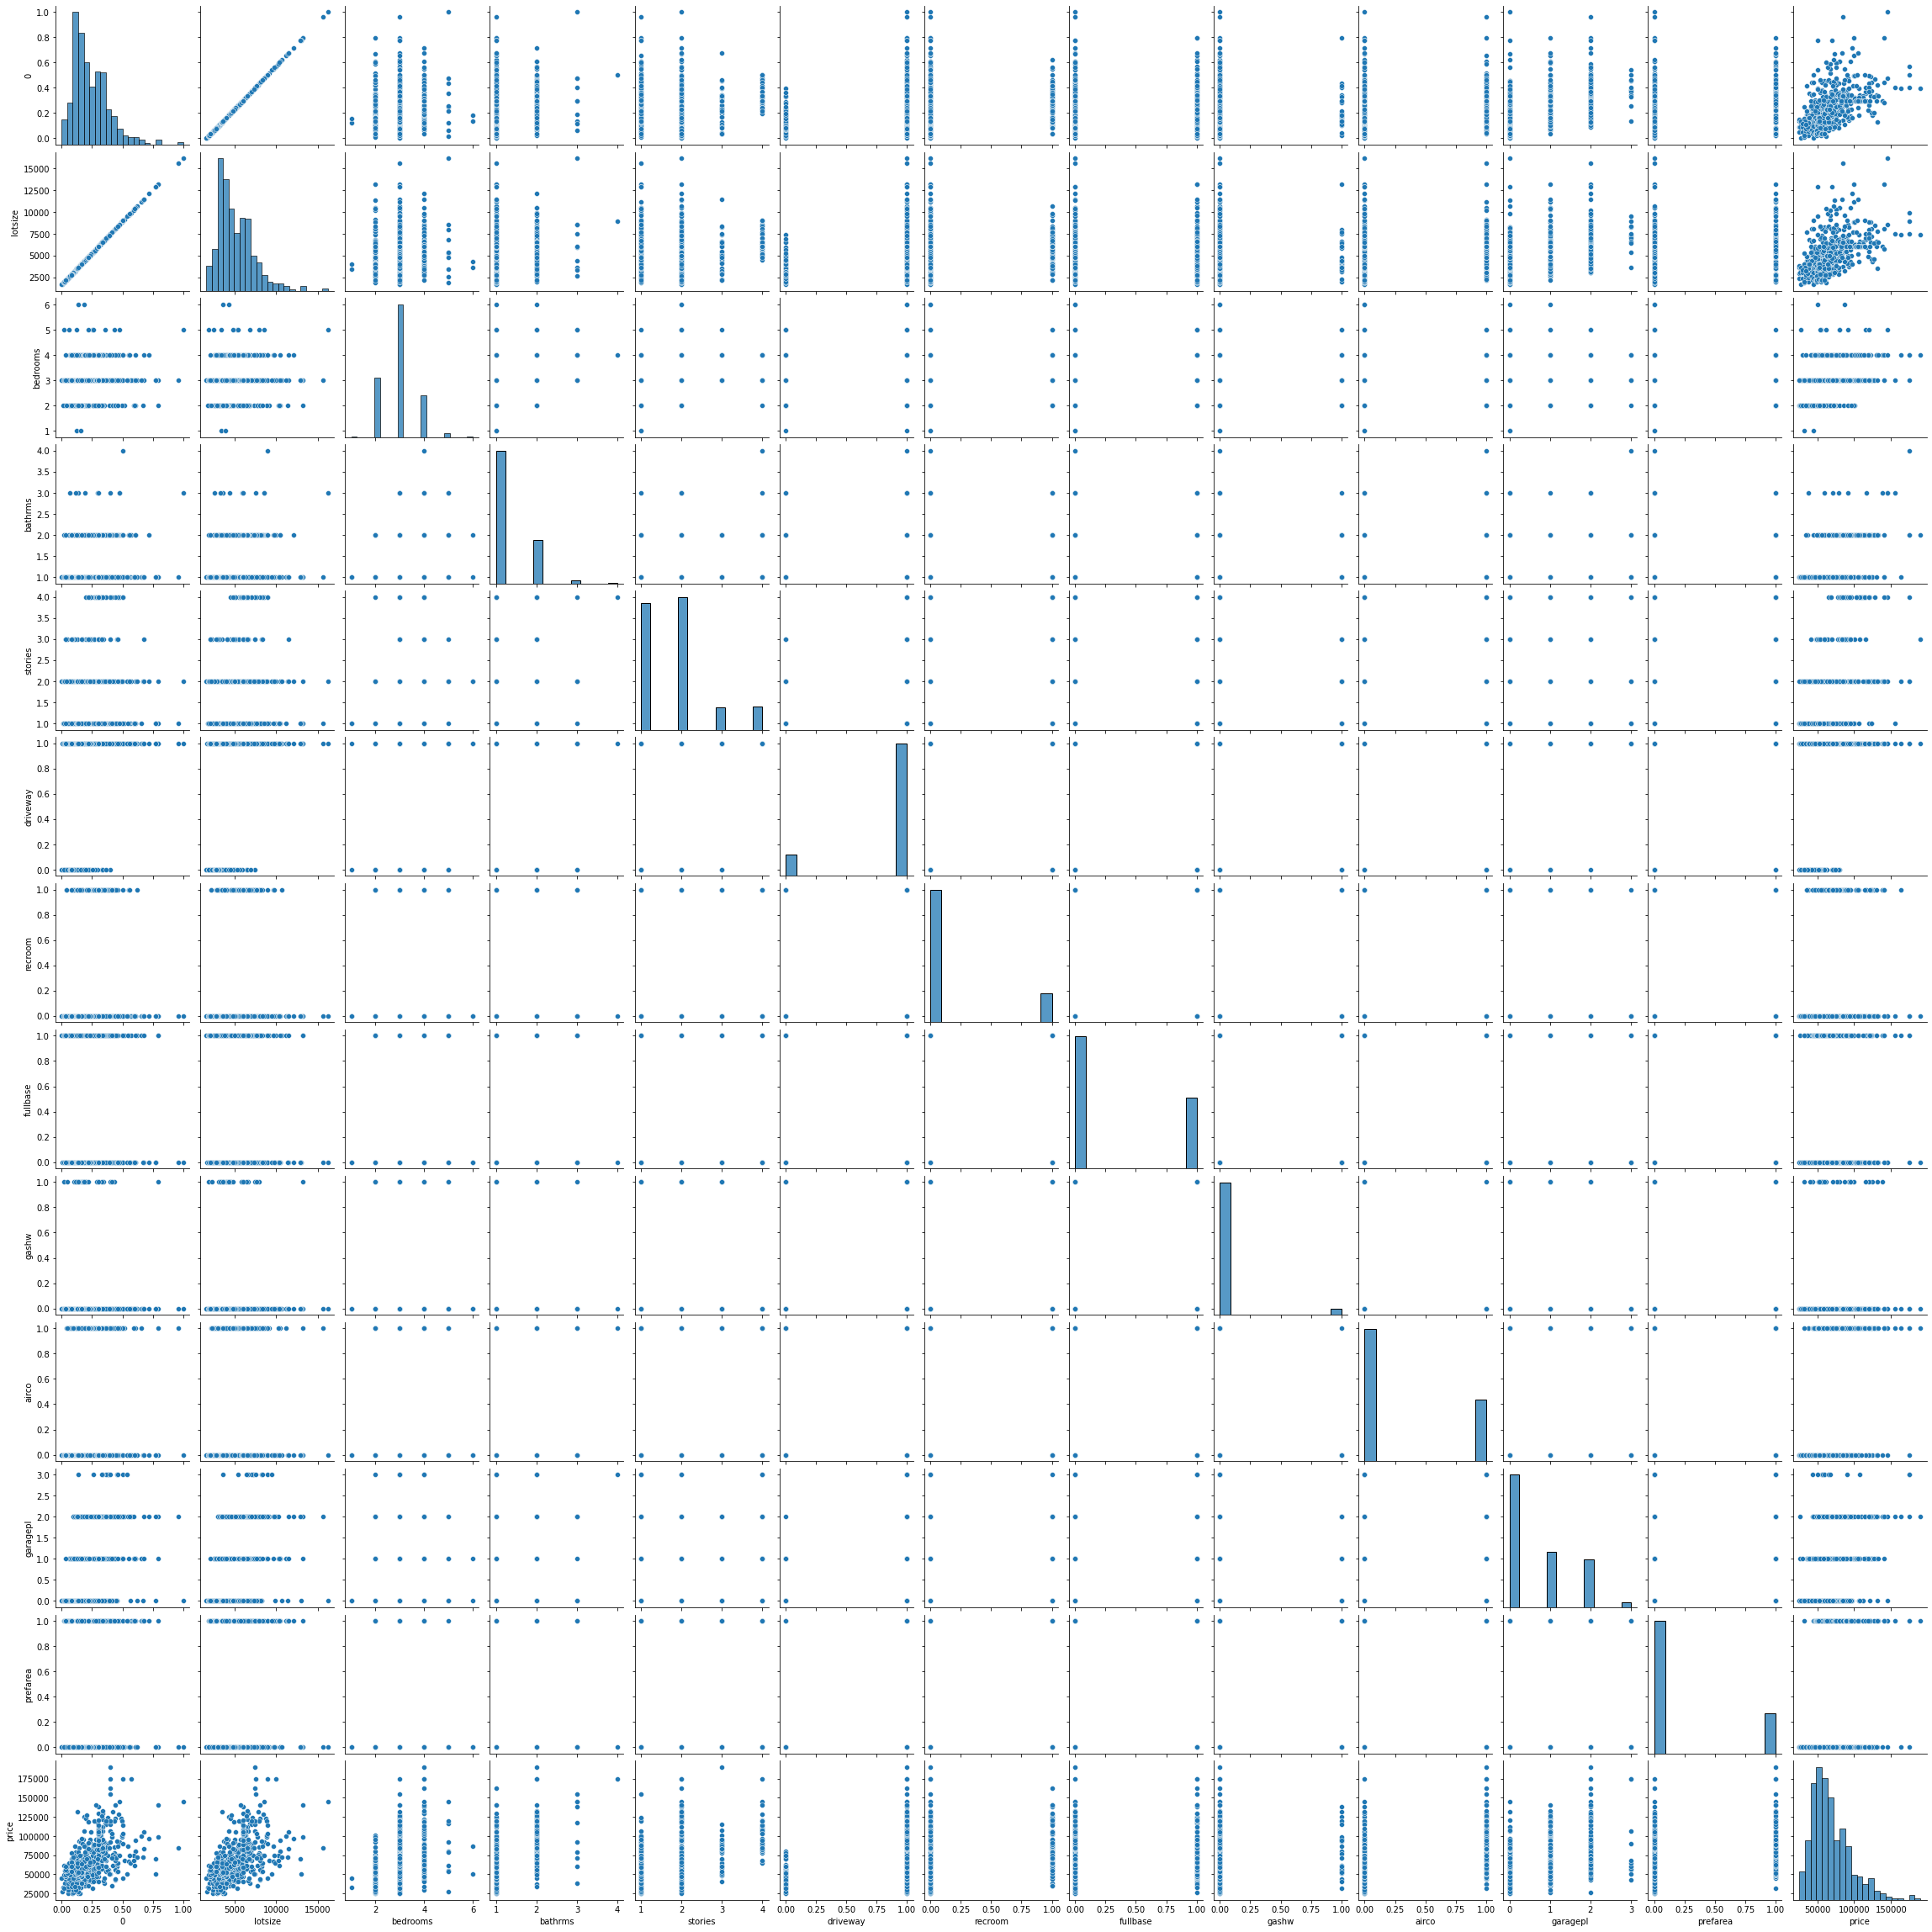

In [136]:
sns.pairplot(data)

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,60))

<Figure size 4320x4320 with 0 Axes>

<Figure size 4320x4320 with 0 Axes>

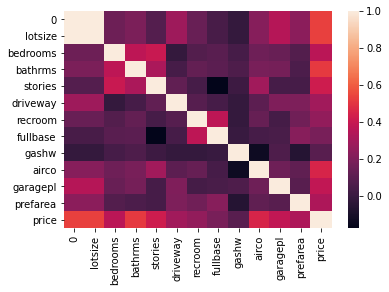

In [138]:
sns.heatmap(data.corr())

In [139]:
data.isnull().any().sum()

0

In [140]:
data.describe()

,0,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.240568,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432,68121.597070
std,0.149014,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032,26702.670926
min,0.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25000.000000
25%,0.134021,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49125.000000
50%,0.202749,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62000.000000
75%,0.323711,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,82000.000000
max,1.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,190000.000000


In [146]:
data.drop(['lotsize'],axis=1,inplace=True)

## Spliting the Data into Training and Testing

In [147]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [148]:
x.head()

,0,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.288660,3,1,2,1,0,1,0,0,1,0
1,0.161512,2,1,1,1,0,0,0,0,0,0
2,0.096907,3,1,1,1,0,0,0,0,0,0
3,0.343643,3,1,2,1,1,0,0,0,0,0
4,0.323711,2,1,1,1,0,0,0,0,0,0


In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
x_train.head()

,0,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
93,0.470790,3,2,4,1,0,0,0,1,2,0
335,0.420619,2,1,1,1,0,0,0,0,1,0
412,0.323711,3,2,4,1,0,0,0,1,0,1
473,0.229553,4,2,2,1,1,1,0,0,0,1
237,0.134021,6,1,2,1,0,0,0,0,1,0


## Model Selection

### Using Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:

model=LinearRegression()

In [153]:


model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
y_pred=model.predict(x_test)

In [155]:
y_pred

array([ 67965.39055778,  66913.33565631, 109975.8073368 ,  61158.44011902,
        56327.64653371,  58151.61312818,  55973.55336425,  54269.43150634,
        98832.10215503,  48611.08929595,  78646.1834425 ,  95179.76473042,
        53624.82795496,  63566.1906301 ,  98074.03694856, 108523.5594545 ,
        77166.88378398,  40353.07238342,  89400.67770365,  54178.60229425,
        33271.36551707,  49729.63973815,  76571.45417133,  52756.67973564,
        73626.89153725,  39262.70314866,  86422.39003048,  42754.50627868,
       100859.04475166,  59969.65556986,  51312.01343866,  77074.93596408,
        74028.29195949,  92757.17729035,  61334.59457096,  53295.81704549,
        34443.79799155,  67190.0825052 ,  70946.78849416, 103443.75010887,
        43595.7350214 , 110558.61242543,  40752.2375375 ,  54707.91028046,
        77237.66559779,  58881.07946019,  56348.36629339,  55261.35070339,
        55350.48922308,  98048.1937209 ,  39351.60451815,  77407.80537511,
        77395.34745099,  

In [156]:
import sklearn.metrics as m

In [157]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

16016.397426383437

In [158]:

m.mean_absolute_error(y_test,y_pred)

11463.135922494626

### Using XGBoost

In [159]:
pip install xgboost

In [160]:

from xgboost import XGBRegressor

In [161]:
model=XGBRegressor()

In [162]:
model.fit(x_train,y_train)

[09:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [163]:
y_pred=model.predict(x_test)

In [164]:
y_pred

array([ 68477.484,  62051.414, 112132.414,  69063.08 ,  66788.07 ,
        60506.14 ,  50517.22 ,  49772.523,  94245.21 ,  52647.473,
        73759.64 ,  84037.25 ,  49406.   ,  55358.305, 107536.78 ,
       112040.02 ,  75808.125,  43805.246,  78008.914,  67948.33 ,
        34197.305,  45167.887,  69493.516,  49528.91 ,  76612.74 ,
        44563.484,  79417.805,  43823.297, 117663.09 ,  59585.65 ,
        51340.223,  81493.055,  82050.36 ,  89981.13 ,  60050.02 ,
        60151.72 ,  36754.84 ,  72599.36 ,  74952.58 , 105734.02 ,
        38719.38 , 108922.12 ,  37396.613,  51649.816,  83268.48 ,
        55770.617,  54602.5  ,  51803.32 ,  59943.832,  91128.01 ,
        45316.67 ,  69600.836,  76327.87 ,  80009.59 ,  66015.97 ,
        84565.38 , 108515.51 ,  72995.46 ,  59591.02 ,  97496.75 ,
        48433.836,  78552.875,  63588.86 ,  50579.395,  36448.195,
        56433.16 ,  42947.137,  62513.26 ,  59551.066,  52452.56 ,
       123848.93 ,  68048.26 ,  60502.984,  49919.26 , 105734.

In [165]:
import sklearn.metrics as m

In [166]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

16177.294168683291

In [167]:
m.mean_absolute_error(y_test,y_pred)

11943.294389204546

In [168]:
0.07216592952568013*(1.90e+05-2.50e+04)+2.50e+04

36907.37837173722

### Using ANN

In [169]:
from keras.models import Sequential
from keras.layers import Dense

In [221]:
model=Sequential()
model.add(Dense(64,input_shape=(11,),activation='relu'))
model.add(Dense(16,activation='relu'))


model.add(Dense(1,activation='linear'))

In [222]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mse'])

In [223]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
14/14 [==============================] - 0s 2ms/step - loss: 5471653376.0000 - mse: 5471653376.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 5471485440.0000 - mse: 5471485440.0000
Epoch 3/500
14/14 [==============================] - 0s 1ms/step - loss: 5471264768.0000 - mse: 5471264768.0000
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 5470932480.0000 - mse: 5470932480.0000
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 5470439424.0000 - mse: 5470439424.0000
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 5469689344.0000 - mse: 5469689344.0000
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 5468624384.0000 - mse: 5468624384.0000
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 5467181568.0000 - mse: 5467181568.0000
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 5465195008.0000 - mse: 54651950

In [225]:

model.fit(x_train,y_train,epochs=500)

Epoch 1/500
14/14 [==============================] - 0s 2ms/step - loss: 267525728.0000 - mse: 267525728.0000
Epoch 2/500
14/14 [==============================] - 0s 1ms/step - loss: 267790736.0000 - mse: 267790736.0000
Epoch 3/500
14/14 [==============================] - 0s 1ms/step - loss: 267946832.0000 - mse: 267946832.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 267260784.0000 - mse: 267260784.0000
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 267197040.0000 - mse: 267197040.0000
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 267089504.0000 - mse: 267089504.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 267102176.0000 - mse: 267102176.0000
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 267004352.0000 - mse: 267004352.0000
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 266888048.0000 - mse: 266888048.0000
Epoch 10/5

In [226]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
14/14 [==============================] - 0s 1ms/step - loss: 242104032.0000 - mse: 242104032.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 242526608.0000 - mse: 242526608.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 242097424.0000 - mse: 242097424.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 242077072.0000 - mse: 242077072.0000
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 242159328.0000 - mse: 242159328.0000
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 242036752.0000 - mse: 242036752.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 242204064.0000 - mse: 242204064.0000
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 242150160.0000 - mse: 242150160.0000
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 241969520.0000 - mse: 241969520.0000
Epoch 10/5

In [208]:
np.sqrt(235151616.0000)

15334.654088045156

In [227]:
y_pred=model.predict(x_test)

In [228]:
y_pred

array([[ 66328.766],
       [ 69030.94 ],
       [111446.42 ],
       [ 59700.793],
       [ 54051.59 ],
       [ 59496.188],
       [ 55203.457],
       [ 54481.414],
       [ 98127.766],
       [ 46791.227],
       [ 80140.7  ],
       [ 92024.31 ],
       [ 56546.207],
       [ 66140.164],
       [ 98609.41 ],
       [105400.35 ],
       [ 77765.234],
       [ 41136.02 ],
       [ 91078.2  ],
       [ 53467.19 ],
       [ 33918.074],
       [ 51353.523],
       [ 74079.42 ],
       [ 53445.45 ],
       [ 73184.   ],
       [ 41154.812],
       [ 90271.664],
       [ 43337.598],
       [100736.14 ],
       [ 58385.   ],
       [ 52836.375],
       [ 76171.84 ],
       [ 72630.81 ],
       [ 96103.39 ],
       [ 57602.23 ],
       [ 52097.152],
       [ 35608.27 ],
       [ 68192.09 ],
       [ 70120.69 ],
       [103383.64 ],
       [ 45124.15 ],
       [107826.36 ],
       [ 41645.89 ],
       [ 54781.684],
       [ 77213.08 ],
       [ 59737.285],
       [ 58890.145],
       [ 5134

In [229]:
import sklearn.metrics as m

In [230]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

15963.595392704518

In [231]:
m.mean_absolute_error(y_test,y_pred)

11575.358966619318

In [232]:
m.r2_score(y_test,y_pred)

0.6185514689062159

In [233]:
model.save('model.h5')